In [78]:
#Business Problem.

In [ ]:
#Retail business generate large volumes of sales data but often struggle to convert it into actionable insights.

In [ ]:
#This project focus on analyzing retail sales data to understand the sales trends, customer behaviour, using EDA and statistical techniques.

In [ ]:
#Objectives.
#Perform EDA on retail sales data.
#Apply statistical reasoning to support business decisions.
#Identify high value customers and key revenue drivers.
#Communicate insights using visual story telling.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Data Loading and understanding.

In [10]:
df = pd.read_csv(r"C:\Users\anipi\OneDrive\Desktop\Sales_Data.csv")
print(df)
print(df.head()) #Top 5 values.
print(df.info()) #Structure, Data types, missing values
print(df.describe()) #Statistical summary of the Dataframe.

     Order_id  Order_Date Region Customer_Type  Product_Price  Quantity  \
0       10001  01-01-2024   East        Online        2511.37        12   
1       10002  02-01-2024   West        Retail        1365.40         5   
2       10003  03-01-2024  North        Retail        2349.77         5   
3       10004  04-01-2024   East        Online        4902.16        11   
4       10005  05-01-2024   East        Retail        2513.83         6   
..        ...         ...    ...           ...            ...       ...   
495     10496  10-05-2025   East        Retail         187.58         1   
496     10497  11-05-2025   East        Retail        4939.84        17   
497     10498  12-05-2025   West        Retail        2196.09        17   
498     10499  13-05-2025  North     Wholesale        1983.20         3   
499     10500  14-05-2025   West        Retail        3430.27        12   

      Revenue  
0    30136.44  
1     6827.00  
2    11748.85  
3    53923.76  
4    15082.98  
.. 

In [12]:
#Data Cleaning.

In [14]:
#Missing values.
print(df.isnull().sum())

Order_id         0
Order_Date       0
Region           0
Customer_Type    0
Product_Price    0
Quantity         0
Revenue          0
dtype: int64


In [ ]:
#Filling the missing values with Mean/Median/mode
#df['Product_Price'].fillna(df['Product_Price'].median(), inplace = True)
#df['Region'].fillna(df['Region'].mode()[0], inplace = True)

In [ ]:
#Duplicated Values

In [19]:
print(df.duplicated().sum())
print(df.drop_duplicates(inplace = True))

0
None


In [ ]:
#Date Conversion

In [29]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst = True)
print(df['Order_Date'])

0     2024-01-01
1     2024-01-02
2     2024-01-03
3     2024-01-04
4     2024-01-05
         ...    
495   2025-05-10
496   2025-05-11
497   2025-05-12
498   2025-05-13
499   2025-05-14
Name: Order_Date, Length: 500, dtype: datetime64[ns]


In [ ]:
#Extract some features by using Date Column.

In [33]:
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Month_Name'] = df['Order_Date'].dt.month_name()
df['Quarter'] = df['Order_Date'].dt.quarter
df['Day_Name'] = df['Order_Date'].dt.day_name()
df['Is_Weekend'] = df['Order_Date'].dt.weekday >= 5


In [34]:
#Insights

In [35]:
#Monthly Revenue
df.groupby('Month_Name')['Revenue'].sum()

Month_Name
April        1612076.09
August        985348.26
December      619963.28
February     1321092.33
January      1321899.94
July          852860.94
June          820012.55
March        1641254.85
May          1052581.75
November      663160.23
October       784072.48
September     631919.39
Name: Revenue, dtype: float64

In [38]:
#Weekend vs weekday sales
df.groupby('Is_Weekend')['Revenue'].mean()

Is_Weekend
False    24076.158994
True     25964.627958
Name: Revenue, dtype: float64

In [40]:
#Best Day of sales.
df.groupby('Day_Name')['Revenue'].sum()

Day_Name
Friday       1809822.07
Monday       1740340.09
Saturday     1960542.79
Sunday       1726434.38
Thursday     1609866.71
Tuesday      1668122.32
Wednesday    1791113.73
Name: Revenue, dtype: float64

In [42]:
#Quarterly Sales.
df.groupby('Quarter')['Revenue'].sum()

Quarter
1    4284247.12
2    3484670.39
3    2470128.59
4    2067195.99
Name: Revenue, dtype: float64

In [ ]:
#Exploratory Data Analysis (EDA)

In [45]:
MonthlySales = df.groupby('Month')['Revenue'].sum()
print(MonthlySales)

Month
1     1321899.94
2     1321092.33
3     1641254.85
4     1612076.09
5     1052581.75
6      820012.55
7      852860.94
8      985348.26
9      631919.39
10     784072.48
11     663160.23
12     619963.28
Name: Revenue, dtype: float64


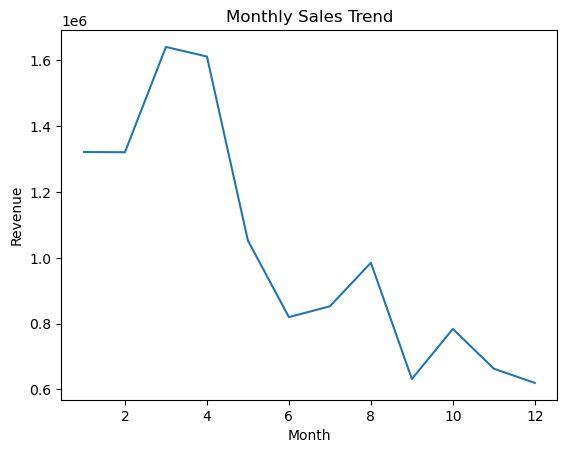

In [48]:
MonthlySales.plot(kind = 'line', title = "Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

In [52]:
#Regional Sales
region_sales = df.groupby('Region')['Revenue'].sum()
region_sales = region_sales.sort_values(ascending=False)


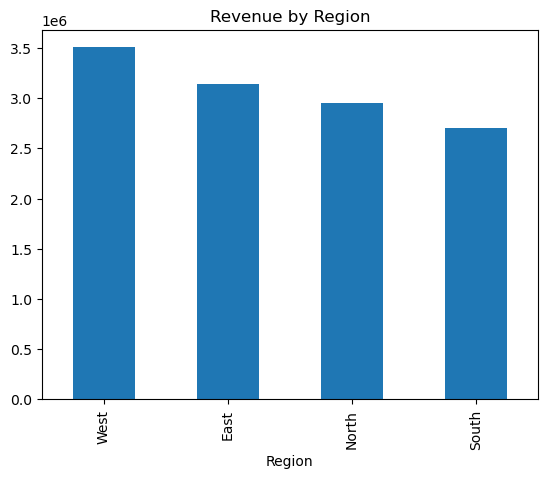

In [53]:
region_sales.plot(kind = 'bar', title = 'Revenue by Region')
plt.show()

In [ ]:
#Insight : Highlights the top - performing and underperforming regions.

In [ ]:
#Customer Analysis

In [55]:
customer_value = df.groupby('Customer_Type')['Revenue'].sum()
print(customer_value)

Customer_Type
Online       3606528.12
Retail       4774813.71
Wholesale    3924900.26
Name: Revenue, dtype: float64


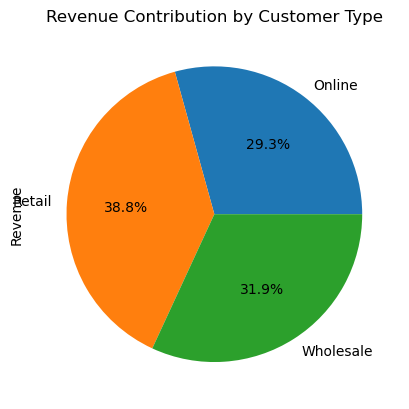

In [56]:
customer_value.plot(kind = 'pie', autopct = '%1.1f%%',title = 'Revenue Contribution by Customer Type')
plt.show()

In [ ]:
#Insight : Returning customers typically contribute a higher share of revenue.

In [ ]:
#Statistical Analysis

In [60]:
#Correlation and covarience.
df[['Product_Price', 'Quantity', 'Revenue']].corr()


,Product_Price,Quantity,Revenue
Product_Price,1.000000,0.042324,0.699598
Quantity,0.042324,1.000000,0.647922
Revenue,0.699598,0.647922,1.000000


In [61]:
df[['Product_Price','Quantity']].cov()

,Product_Price,Quantity
Product_Price,1.978862e+06,324.357068
Quantity,3.243571e+02,29.680204


In [62]:
#Interpretation :Negative Corelation between the price and quantity may indicate price sensivity.
#Strong corelation between the quatity and revenue confirms sales volume impact.

In [ ]:
#Percentiles and Quantiles.

In [63]:
df['Revenue'].quantile([0.25, 0.5, 0.75])

0.25     6805.7650
0.50    18598.7800
0.75    37511.3725
Name: Revenue, dtype: float64

In [65]:
Q1 = df['Revenue'].quantile(0.25)
Q3 = df['Revenue'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

30705.6075


In [ ]:
#Use Case
#Detects revenue outliers and spreding patterens.

In [ ]:
#Does returning customers spend more than new customers. 

In [71]:
from scipy.stats import ttest_ind

retail = df[df['Customer_Type'] == 'Retail']['Revenue']
wholesale = df[df['Customer_Type'] == 'Wholesale']['Revenue']

ttest_ind(retail, wholesale, nan_policy='omit')


TtestResult(statistic=0.8812820660704945, pvalue=0.3787699526465369, df=350.0)

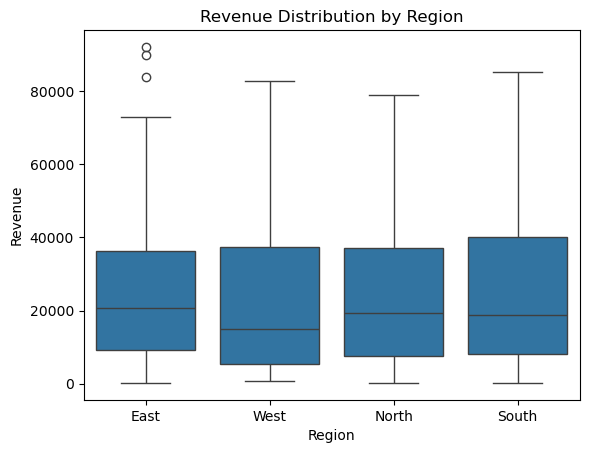

In [74]:
sns.boxplot(x='Region', y='Revenue', data=df)
plt.title('Revenue Distribution by Region')
plt.show()


In [ ]:
#Heat Map : Correlation - Matrix

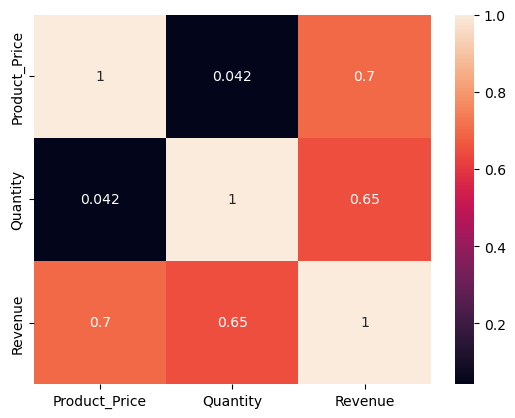

In [77]:
sns.heatmap(df[['Product_Price','Quantity','Revenue']].corr(),annot = True)
plt.show()